# Overview of pygmt codes - Kiara 31 May 2023

Import modules you need

In [20]:
#Import pygmt
import pygmt

#Import any other modules you want to use
import numpy as np
import matplotlib.pyplot as plt

Define the regions you want to plot and plot basemap

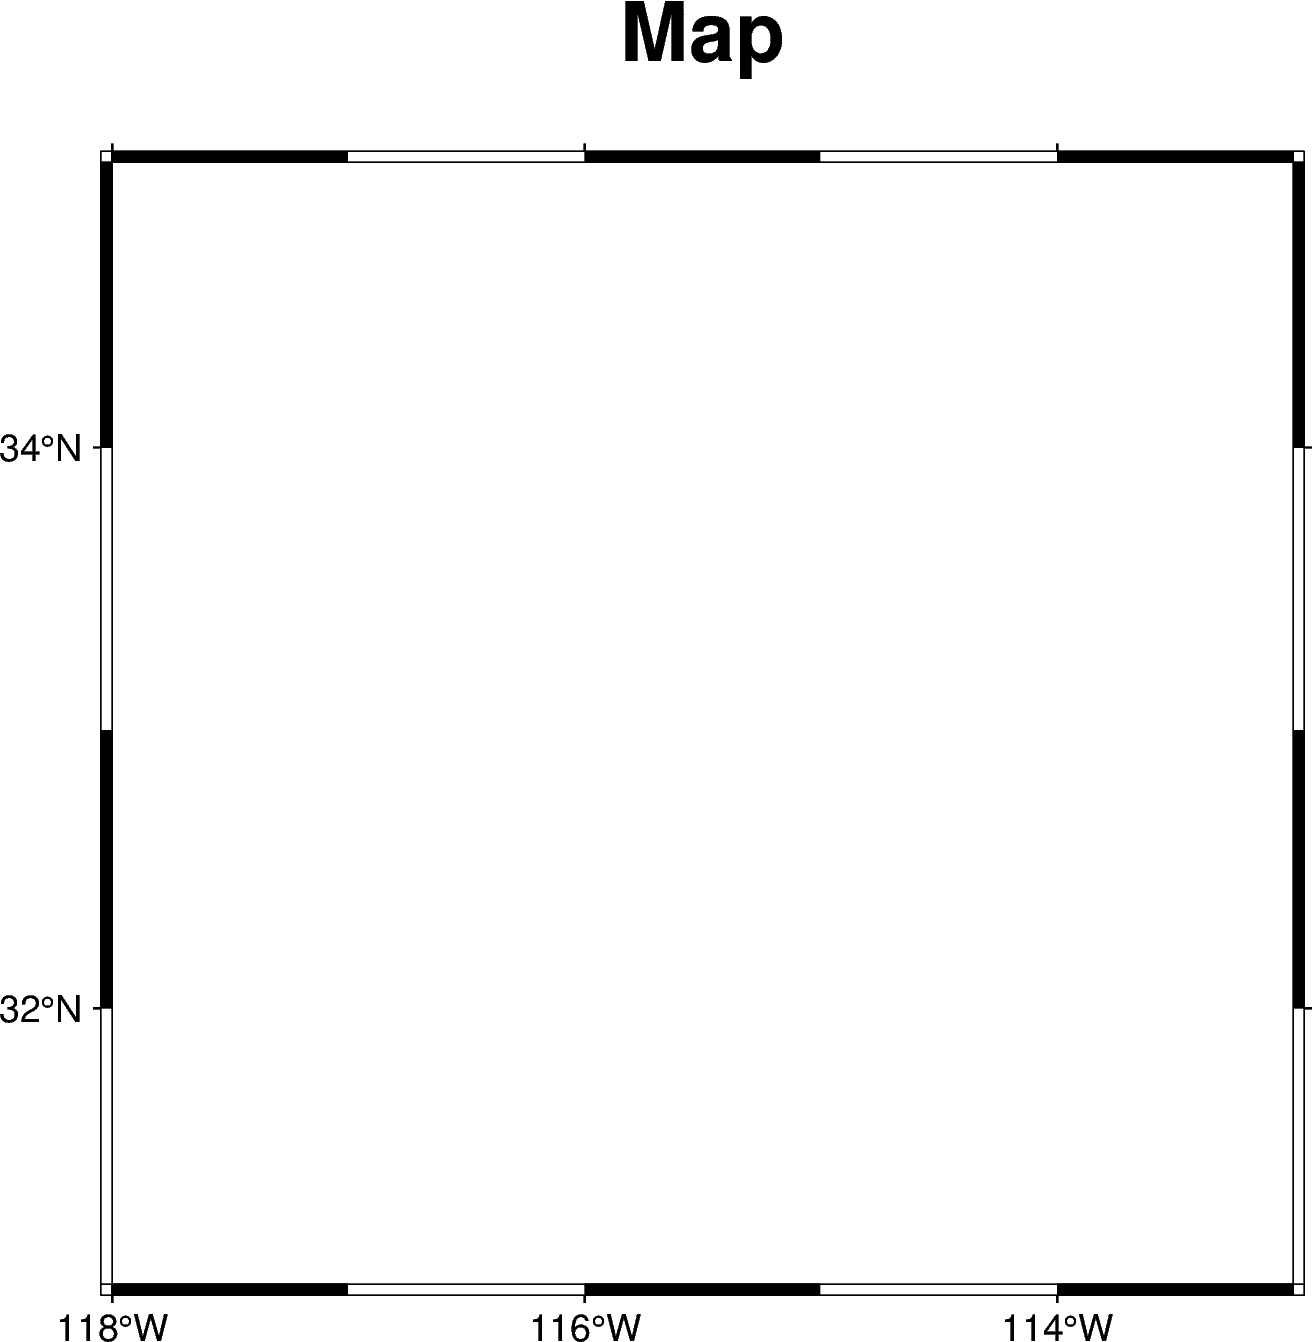

In [21]:
#create the region you want to plot on your map 
region_plot=[-118,-113,31,35]
region_inset=[-122,-105,26,43]

#create the pygmt figure 
fig = pygmt.Figure()

#plot the basemap
fig.basemap(region=region_plot, projection="M10c",frame=["WSne", "xa2f1", "ya2f1"])#, land="white", water="skyblue")#,map_scale= "JBL+w100k+o.7/.3+f+u")
#below defines the frame - 'WSne' labels lat and long only on the west and S edges
#"xa2f1" - a2 - annotate/label every 2 degrees, f1 - have spacing of 1 degree 
#frame=["WSne", "xa2f1+lx-axis", "ya2f1+ly-axis"] add +l followed by string if want to label axes
#for more information refer to https://www.pygmt.org/dev/tutorials/basics/frames.html#sphx-glr-tutorials-basics-frames-py

#add a title to your map - there is probably a way to include this in the fig.basemap above but with all the other variables 
#describing the frame it throws an error so I found it easier to just write the title in a separate line
fig.basemap(frame=["+tMap"])
fig.show()

Add topography and colorbar

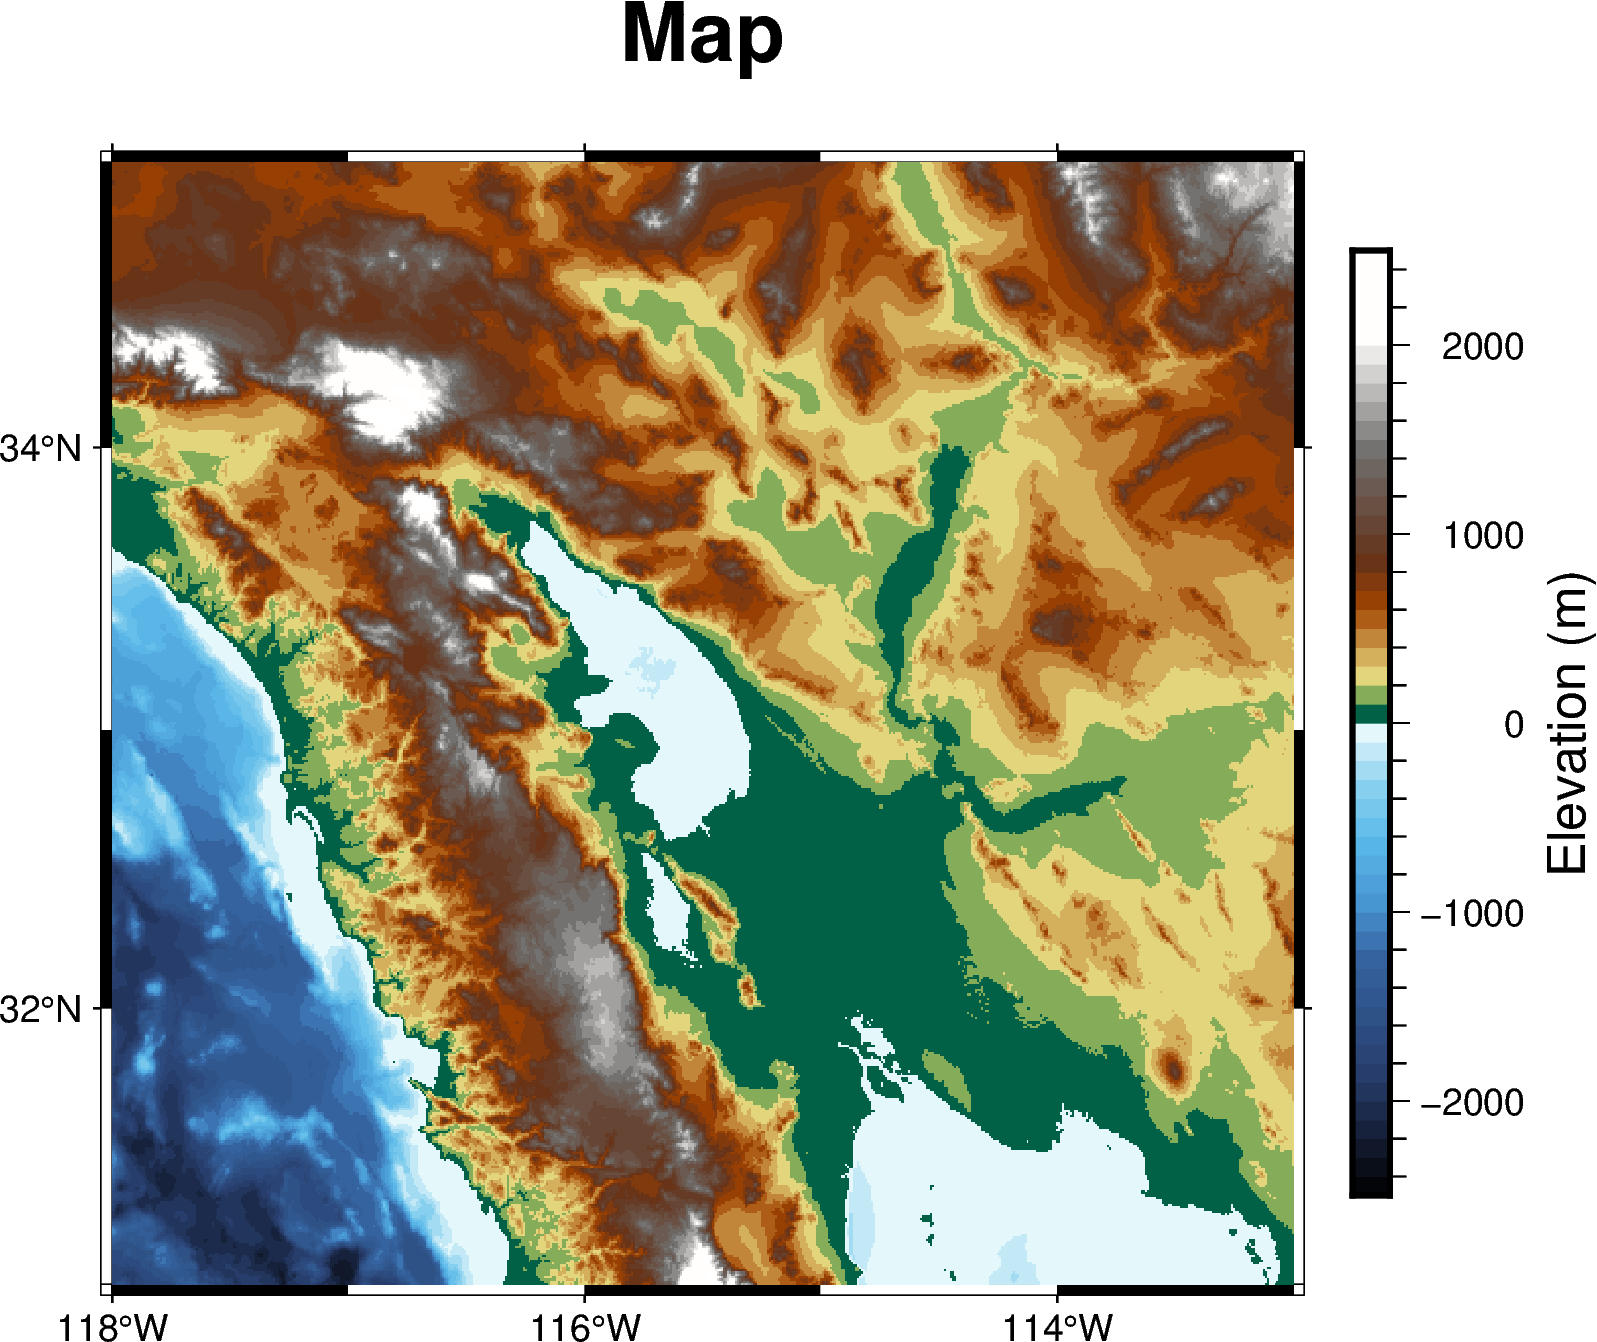

In [22]:
#download the earth relief map at the resolution you want can be "01d", "30m", "20m", "15m", "10m", "06m", "05m", "04m", "03m", "02m", "01m", "30s", "15s", "03s", or "01s".
#find out more at this link https://www.pygmt.org/dev/api/generated/pygmt.datasets.load_earth_relief.html
grid = pygmt.datasets.load_earth_relief(resolution="30s",region=region_plot)

#add topography using the grid you downloaded earlier
topo=pygmt.makecpt(cmap="geo", series=[-2500,2500,100]) #cmap= name of colorscale you want, series sets the extent of colorscale [min, max, spacing]
fig.grdimage(grid=grid, cmap=topo) #this plots your grid image using the topo coloscale you defined
fig.colorbar(frame='af+l"Elevation (m)"',position="JMR+o0.5c/0c+w8c") #plots the colorbar a - annotate/label, f - spacing if no numbers follow these letters then just uses default values
#+l followed by string write label, position="JMR - capital J - outside of plot, MR- middle right, +o0.5c/0c - offset from x and y corners, +w8c - width of 8 cm
# ^small j is in the plot 
fig.show()

Add statelines, shorelines and map scale

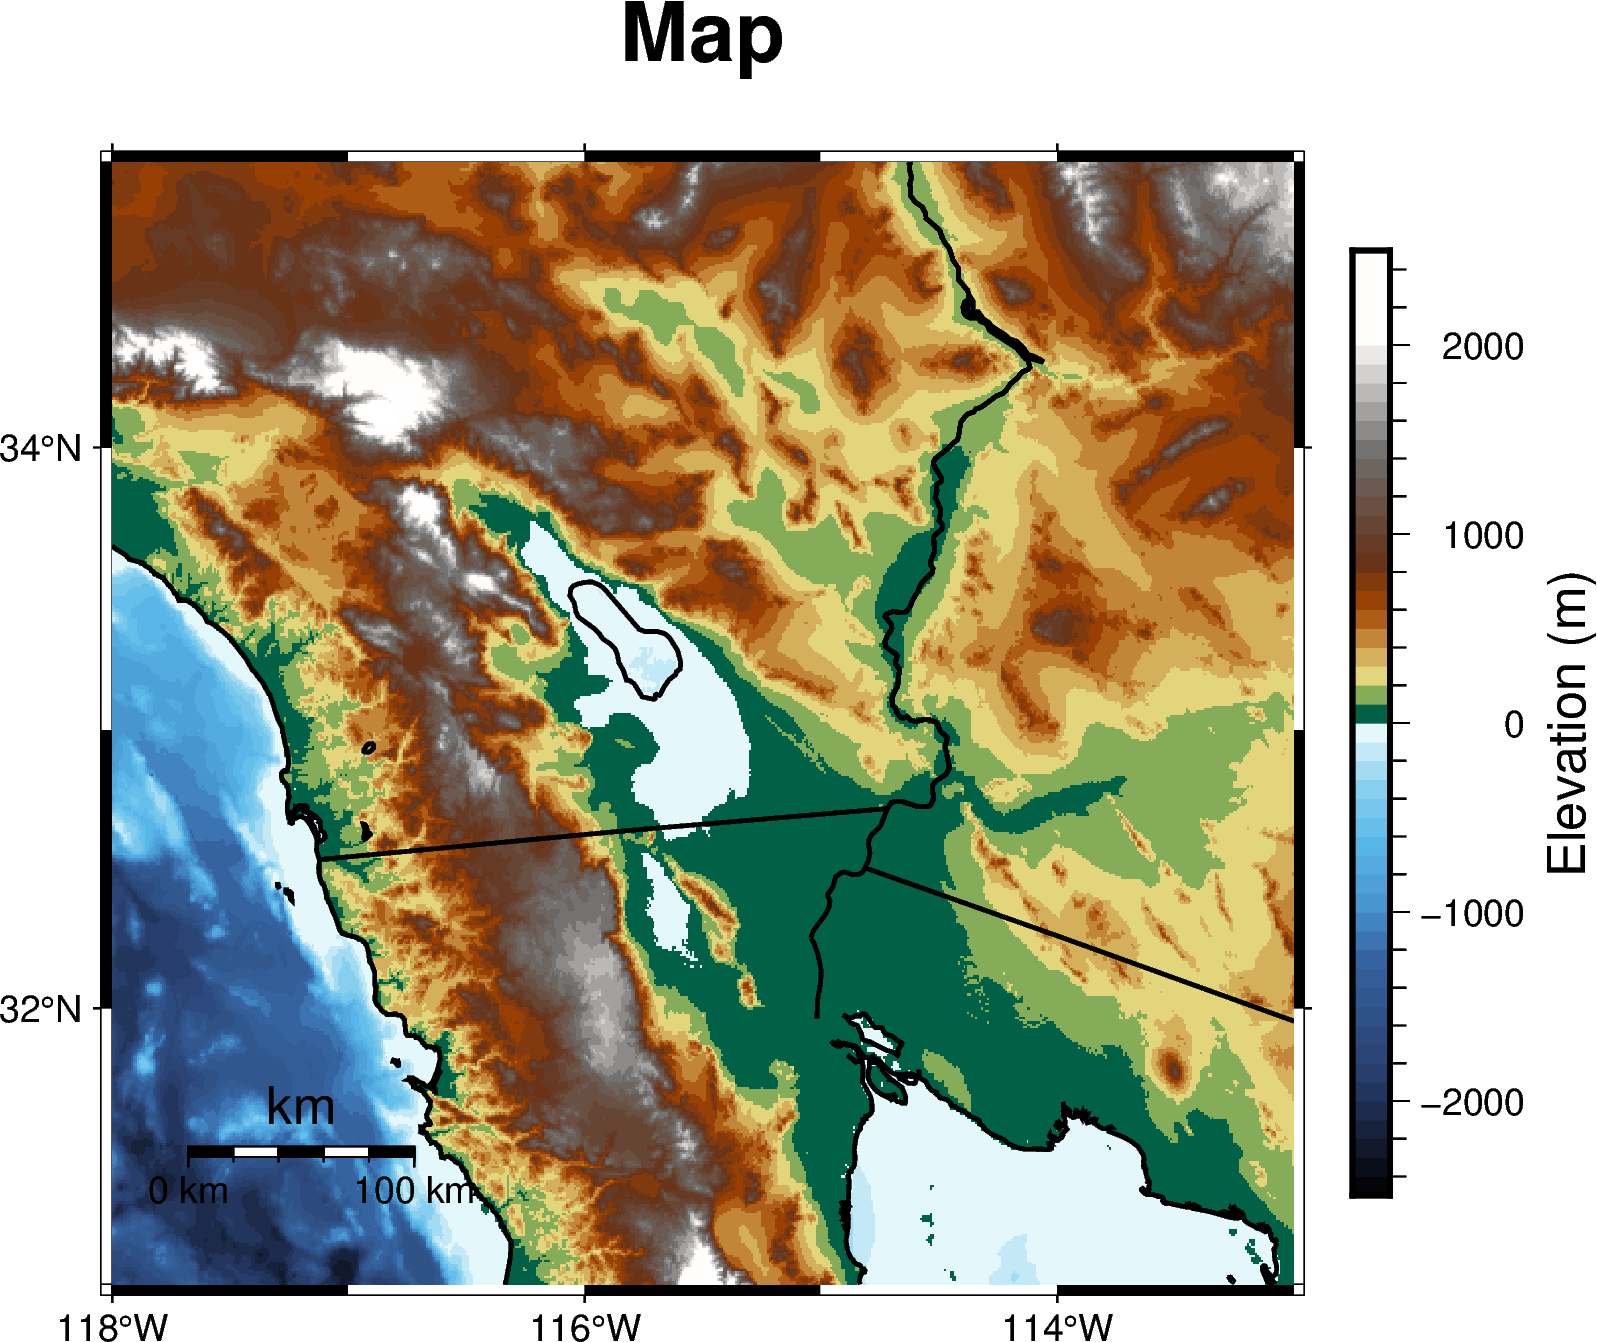

In [23]:
#add state lines, shoreline and map scale - all of which need to be done after plot grid image otherwise won't be seen
#refer to link https://www.pygmt.org/dev/gallery/maps/borders.html to add political boundaries
fig.coast(borders=["a/1p,black"],shorelines='1p,black') #a=All boundaries /1p, black describes the width and color of the line you want
#1 = National boundaries, 2 = State boundaries within the Americas, 3 = Marine boundaries, a = All boundaries (1-3)
#map scale adds a mapscale
fig.basemap(map_scale='f-117.2/31.5/20/100+u+lkm',box="+gwhite") # was trying +g for a fill of the box 
fig.show()

Add text on map

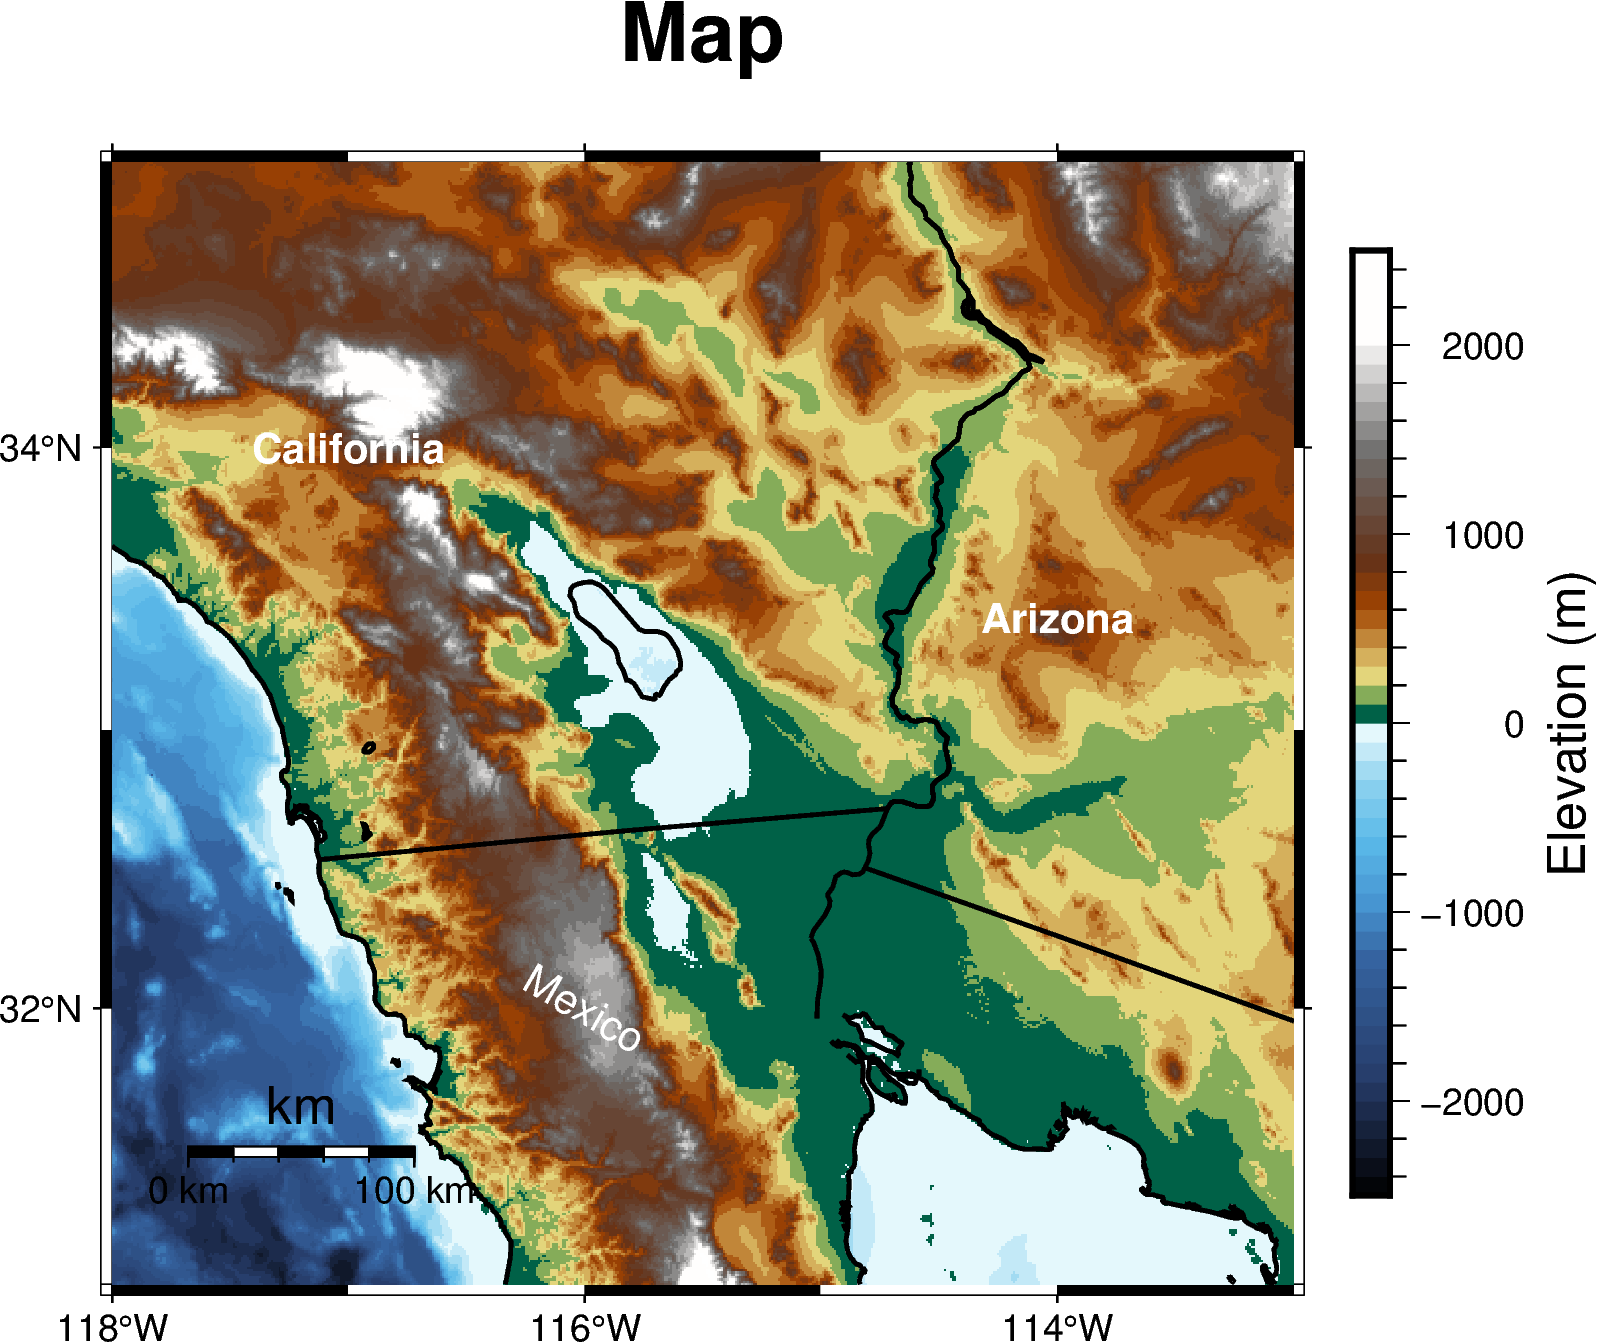

In [24]:
#add text
#x and y are lon and lat coordinates, angle - can rotate font from horizontal
fig.text(text="California", x=-117, y=34, font="10p,Helvetica-Bold,white", angle=0)
fig.text(text="Mexico", x=-116, y=32, font="10p,Helvetica,white", angle=-30)
fig.text(text="Arizona", x=-114, y=33.4, font="10p,Helvetica-Bold,white", angle=0)

fig.show()

Add arrows/vectors

/tmp/ipykernel_33088/1150058953.py:4: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


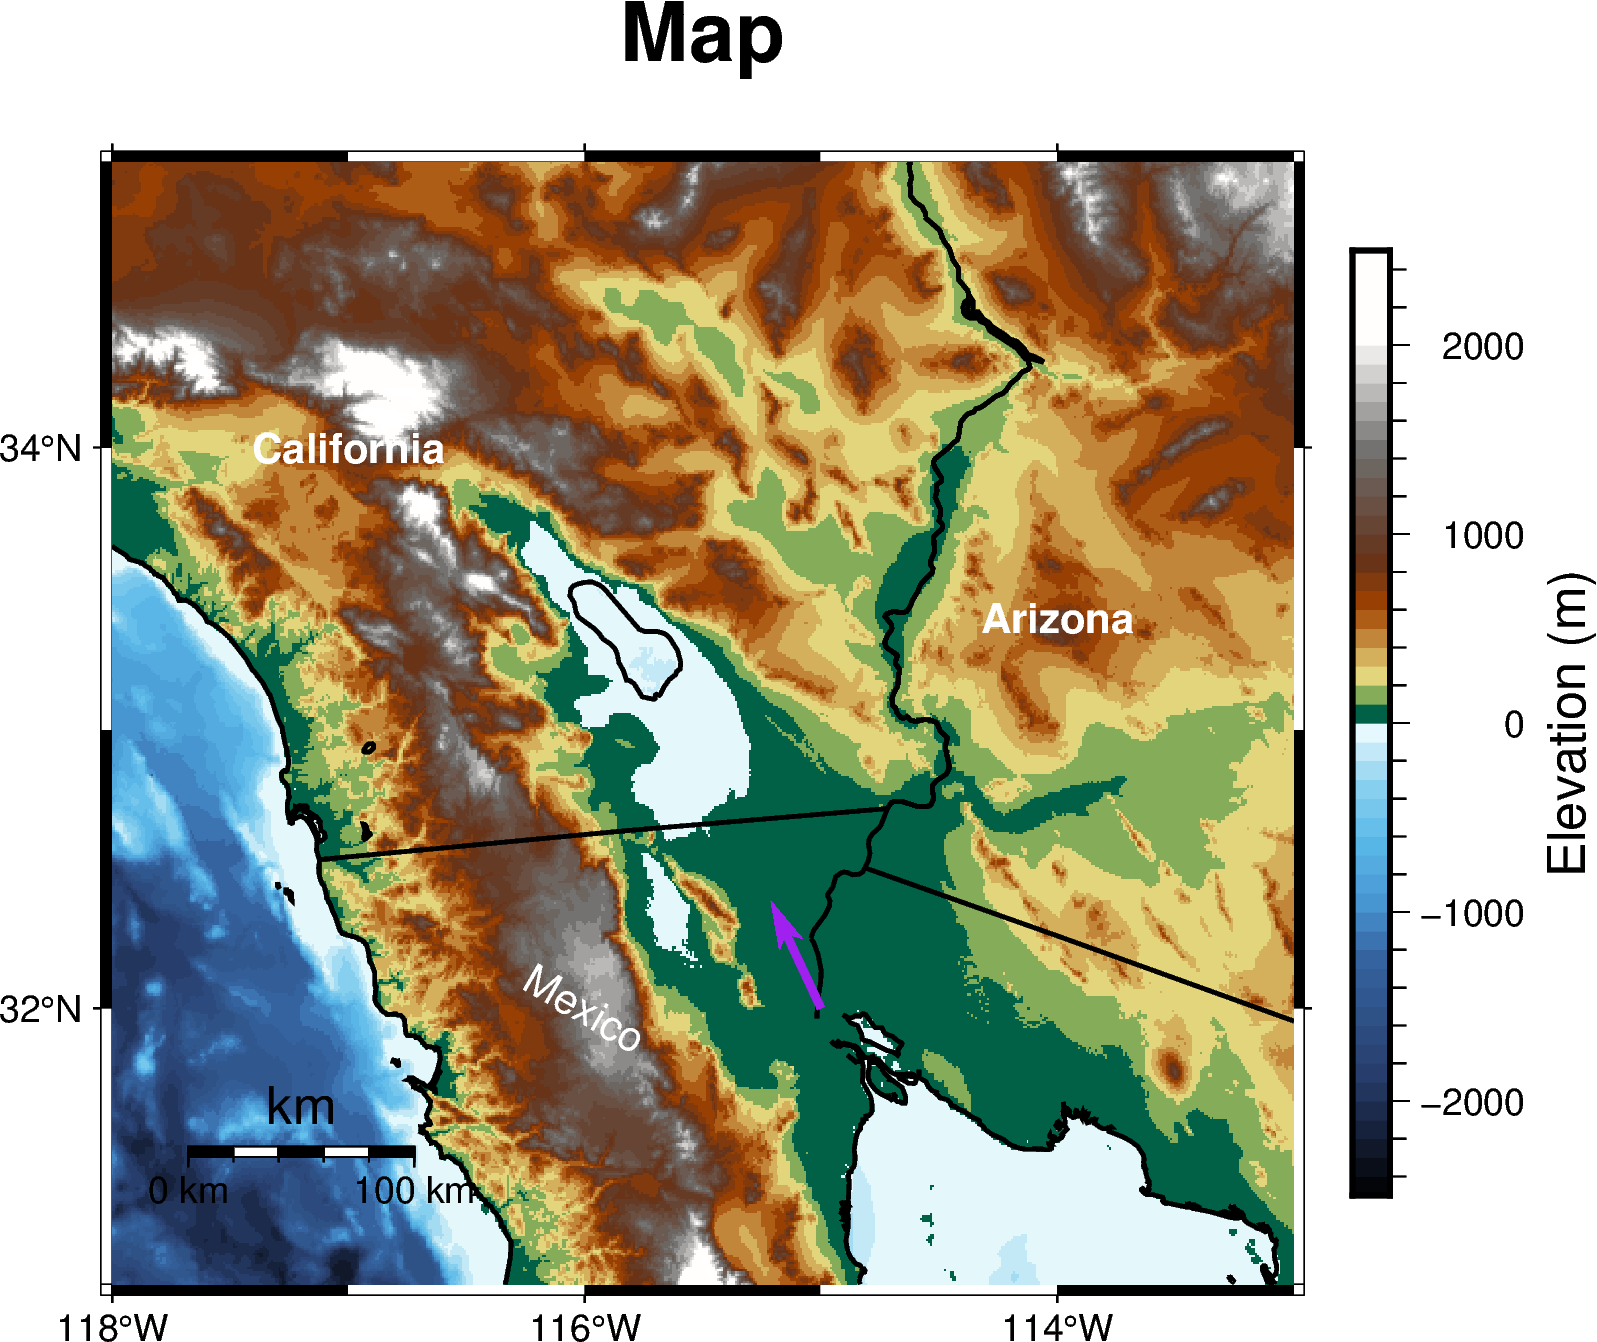

In [25]:
#plot an arrow at certain angle
#pen refers to outline and color is the fill (this is the case for everything in pygmt)
#refer to https://www.pygmt.org/dev/tutorials/advanced/vectors.html#sphx-glr-tutorials-advanced-vectors-py
fig.plot(
    x=[-115],
    y=[32],
    style="v0.4c+e", #v0.4c - vector arrowhead length 0.4cm, arrowhead +e
    direction=[[115.05], [1]], #[angle in degrees],[length]
    pen="2p,purple",
    color="purple",
    )  

fig.show()

Plots points, color by their values and add colorbar

/tmp/ipykernel_33088/2963162694.py:9: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=points[:,0], y=points[:,1], style="c0.5c", color=points[:,2], cmap=True, pen="1p,black")


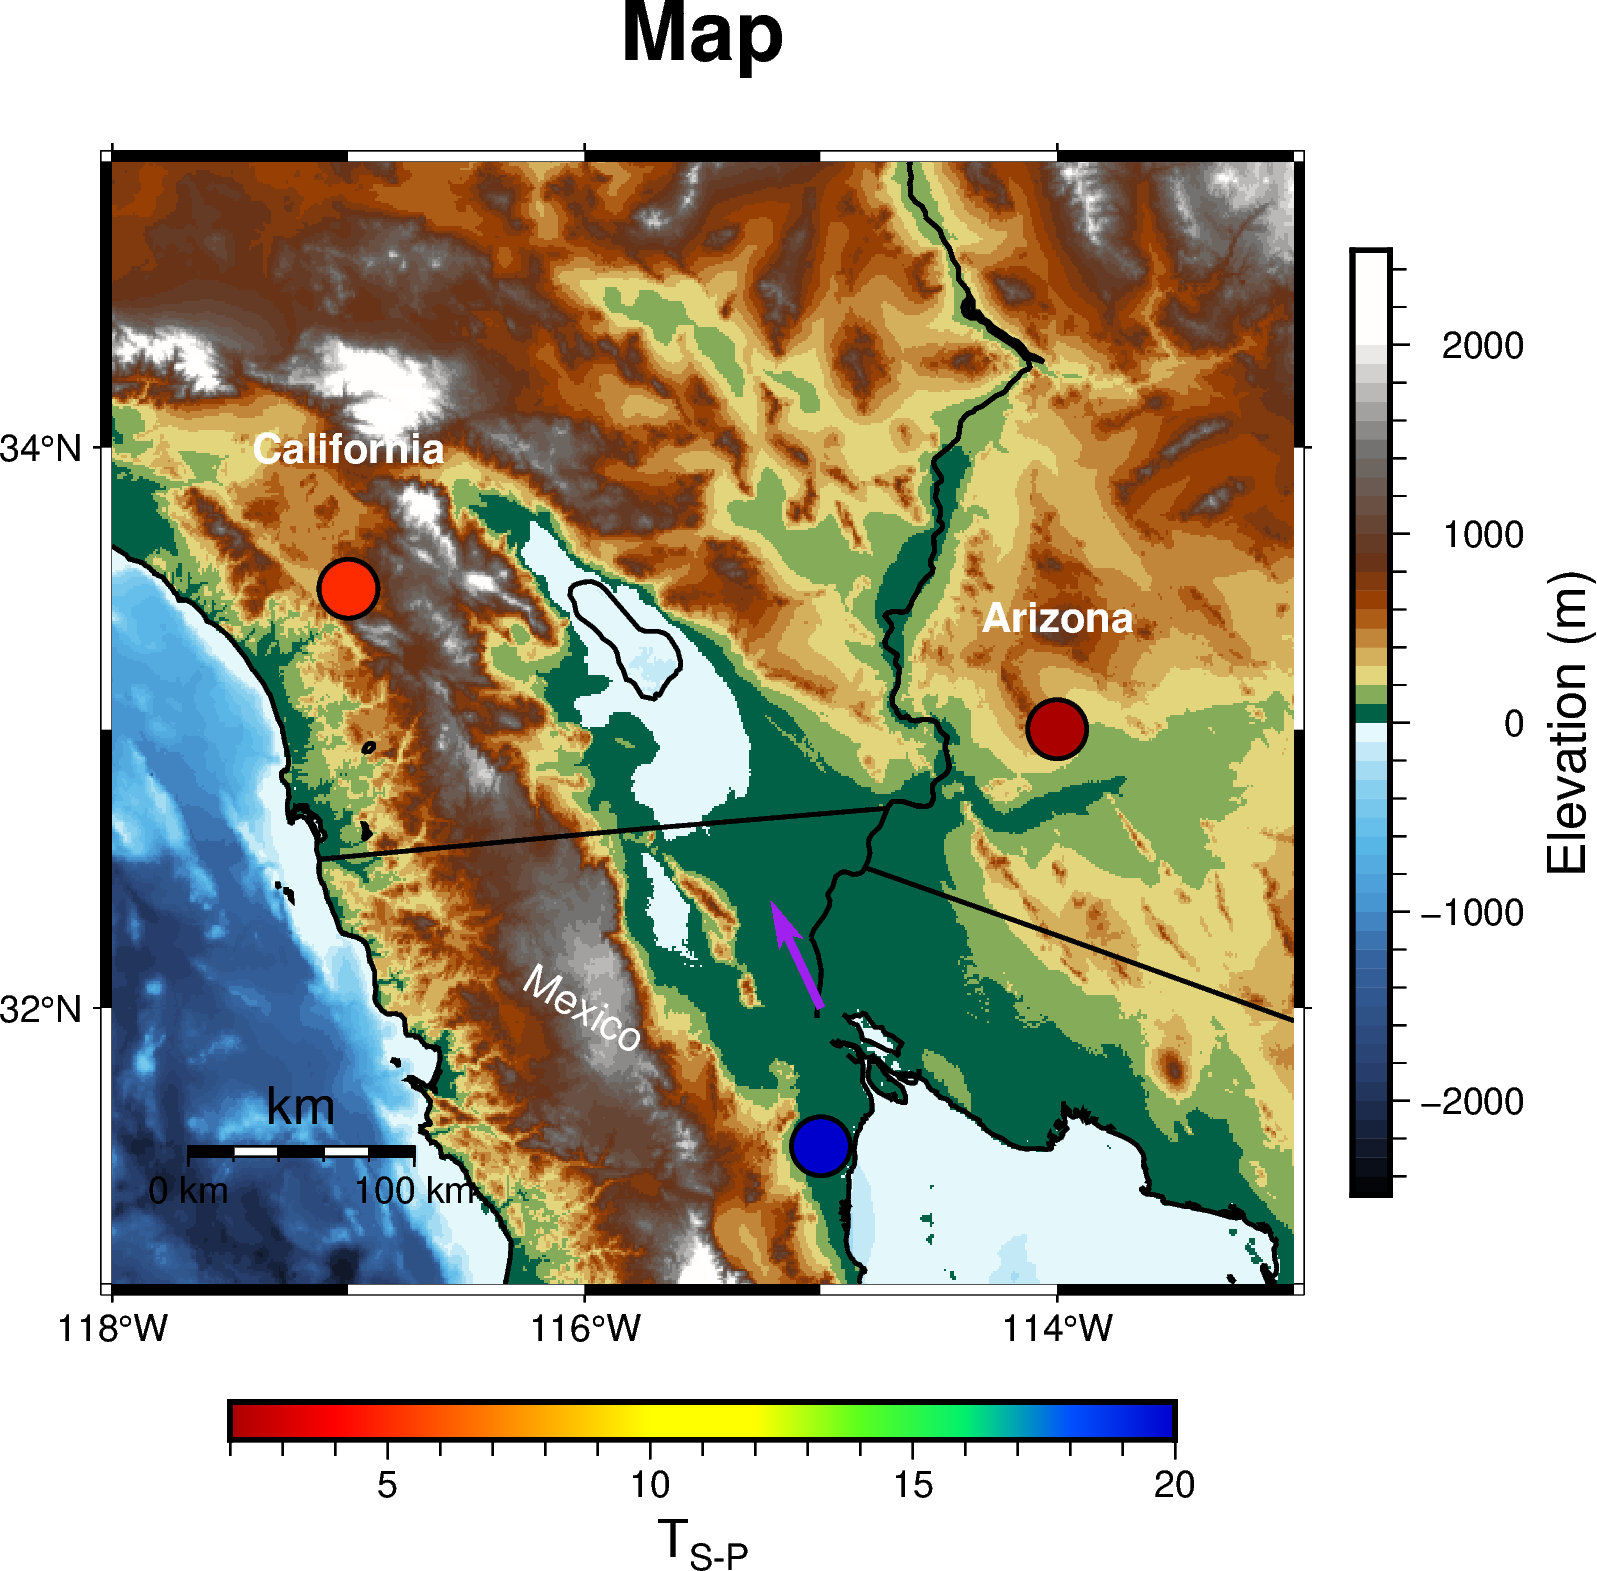

In [26]:
#plot points from arrays - that you write manually or read in from files
points=np.array([[-117, 33.5, 5], [-115, 31.5, 20], [-114, 33, 2]])
#the example below colors points by the 3rd column

#setup the colorscale from min to max of values in 3rd column
pygmt.makecpt(cmap="seis", series=[np.min(points[:,2]), np.max(points[:,2])])
#plot points
#pen= outline around points 1p (width),black (color), color=values of 3rd column, cmap=True to use colorscale 
fig.plot(x=points[:,0], y=points[:,1], style="c0.5c", color=points[:,2], cmap=True, pen="1p,black")
#fig.colorbar(frame='af+l"Point value"')
#fig.colorbar(frame=["af"])
#bplots colorbar and writes title, the default position for colorbar is vertical so need to add +h to make it horizontal
fig.colorbar(frame='af+l"T@-S-P@"',position="JBC+h+o0c/1c+w8c") #plots the colorbar a - annotate/label, f - spacing 
#if no numbers follow these letters then just uses default values
#I added "T@-S-P@" as the label as a way to show you how to write titles and text in latex format (in case you need to)

fig.show()

Plot points for a specific symbol and color and label these - add to legend

/tmp/ipykernel_33088/4055487624.py:5: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=points2[:,0], y=points2[:,1], style="a0.5c",pen="black",color='blue',label="Stations")


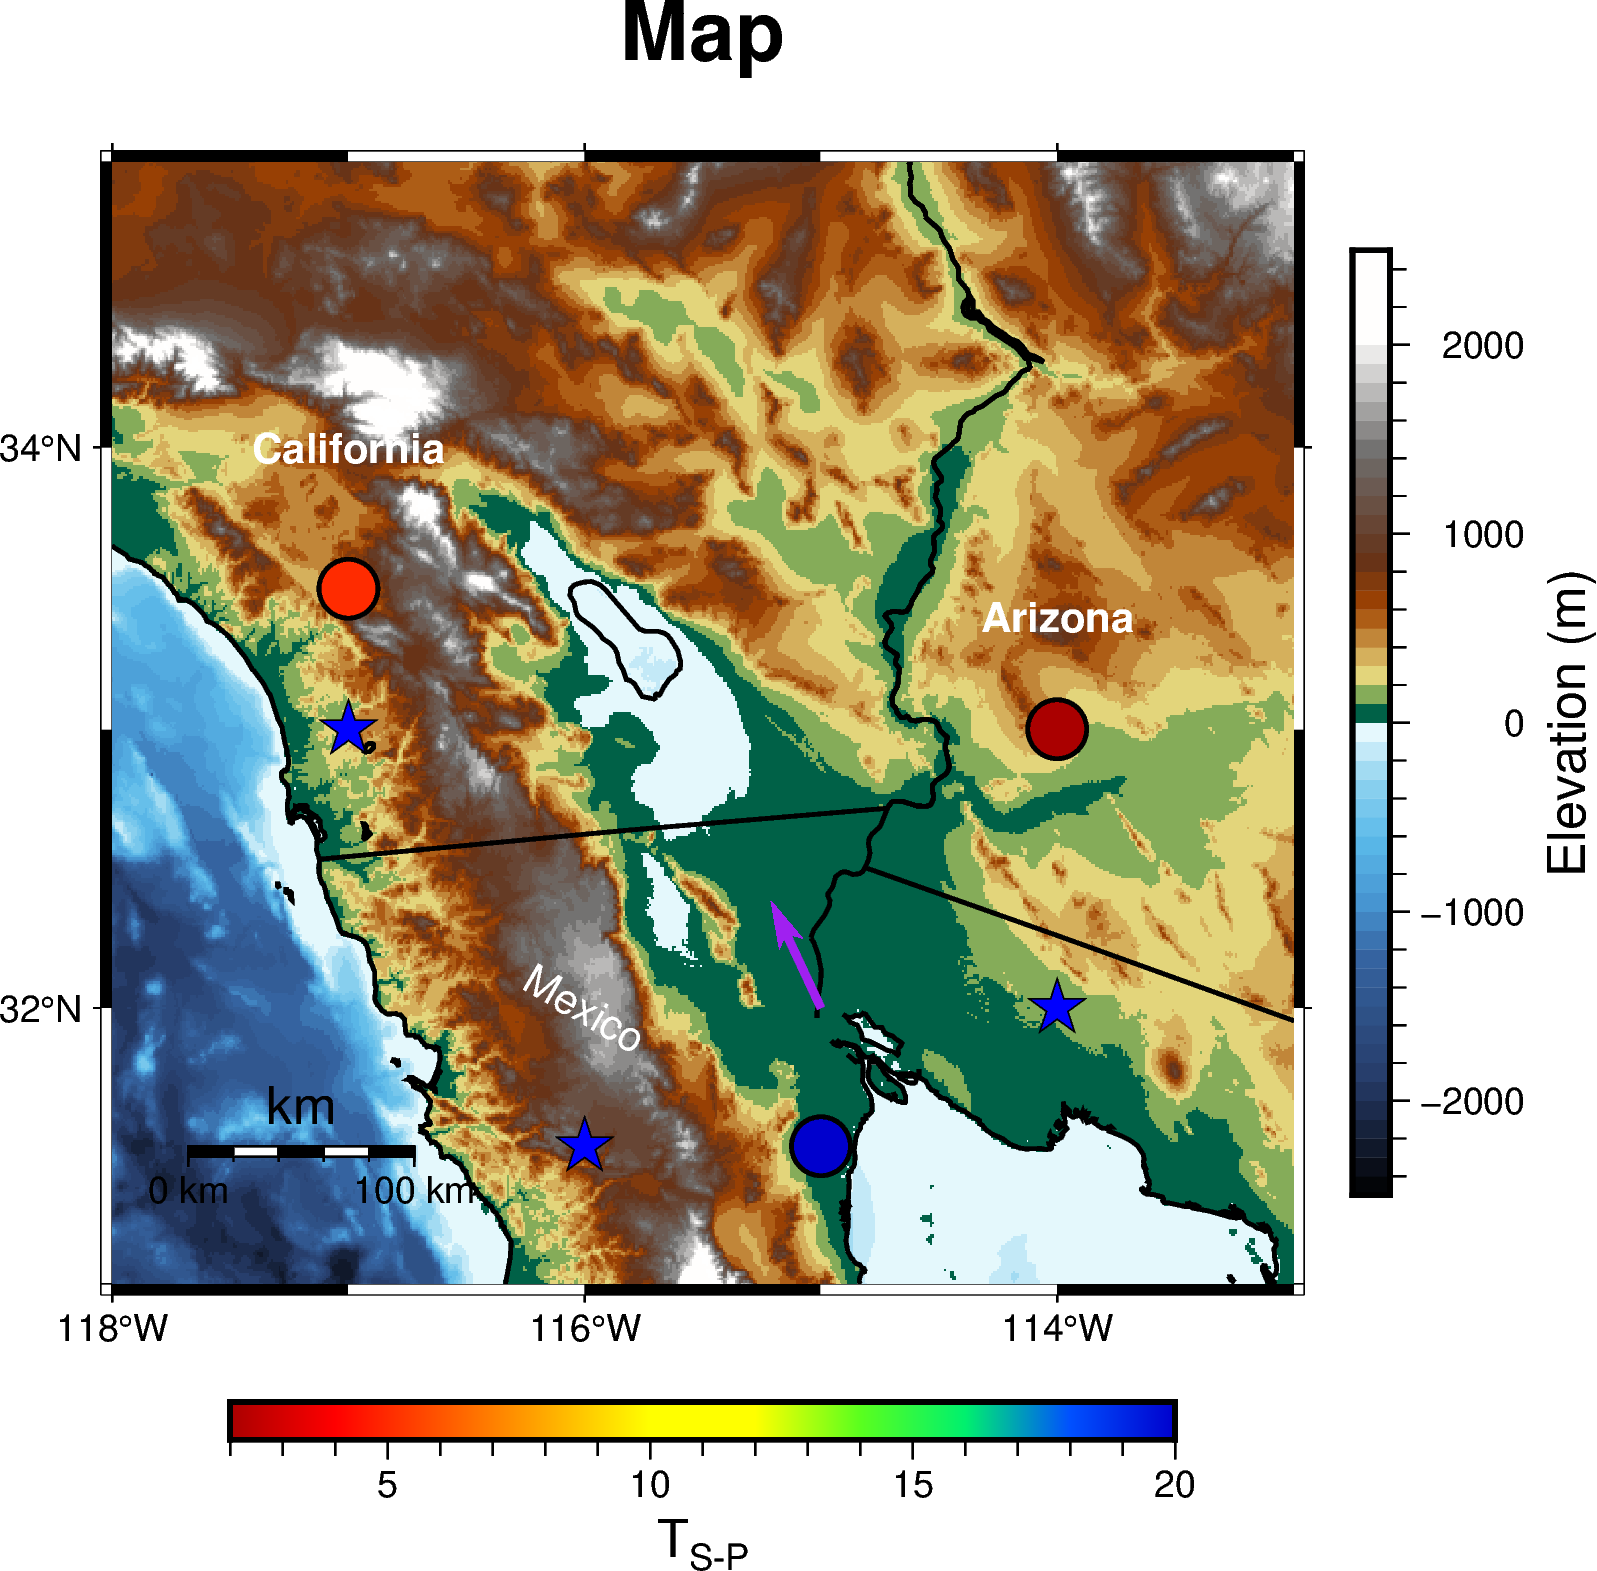

In [27]:
#plot points of specific color and add label which shows up in legend
points2=np.array([[-117, 33], [-116, 31.5], [-114, 32]])
#mostly the same as above but set color='blue' and label='Stations', you can't add a label to variables that change colors (as above)
#only to points that have fixed characteristics
fig.plot(x=points2[:,0], y=points2[:,1], style="a0.5c",pen="black",color='blue',label="Stations")

fig.show()

Connect points using lines to make rectangle

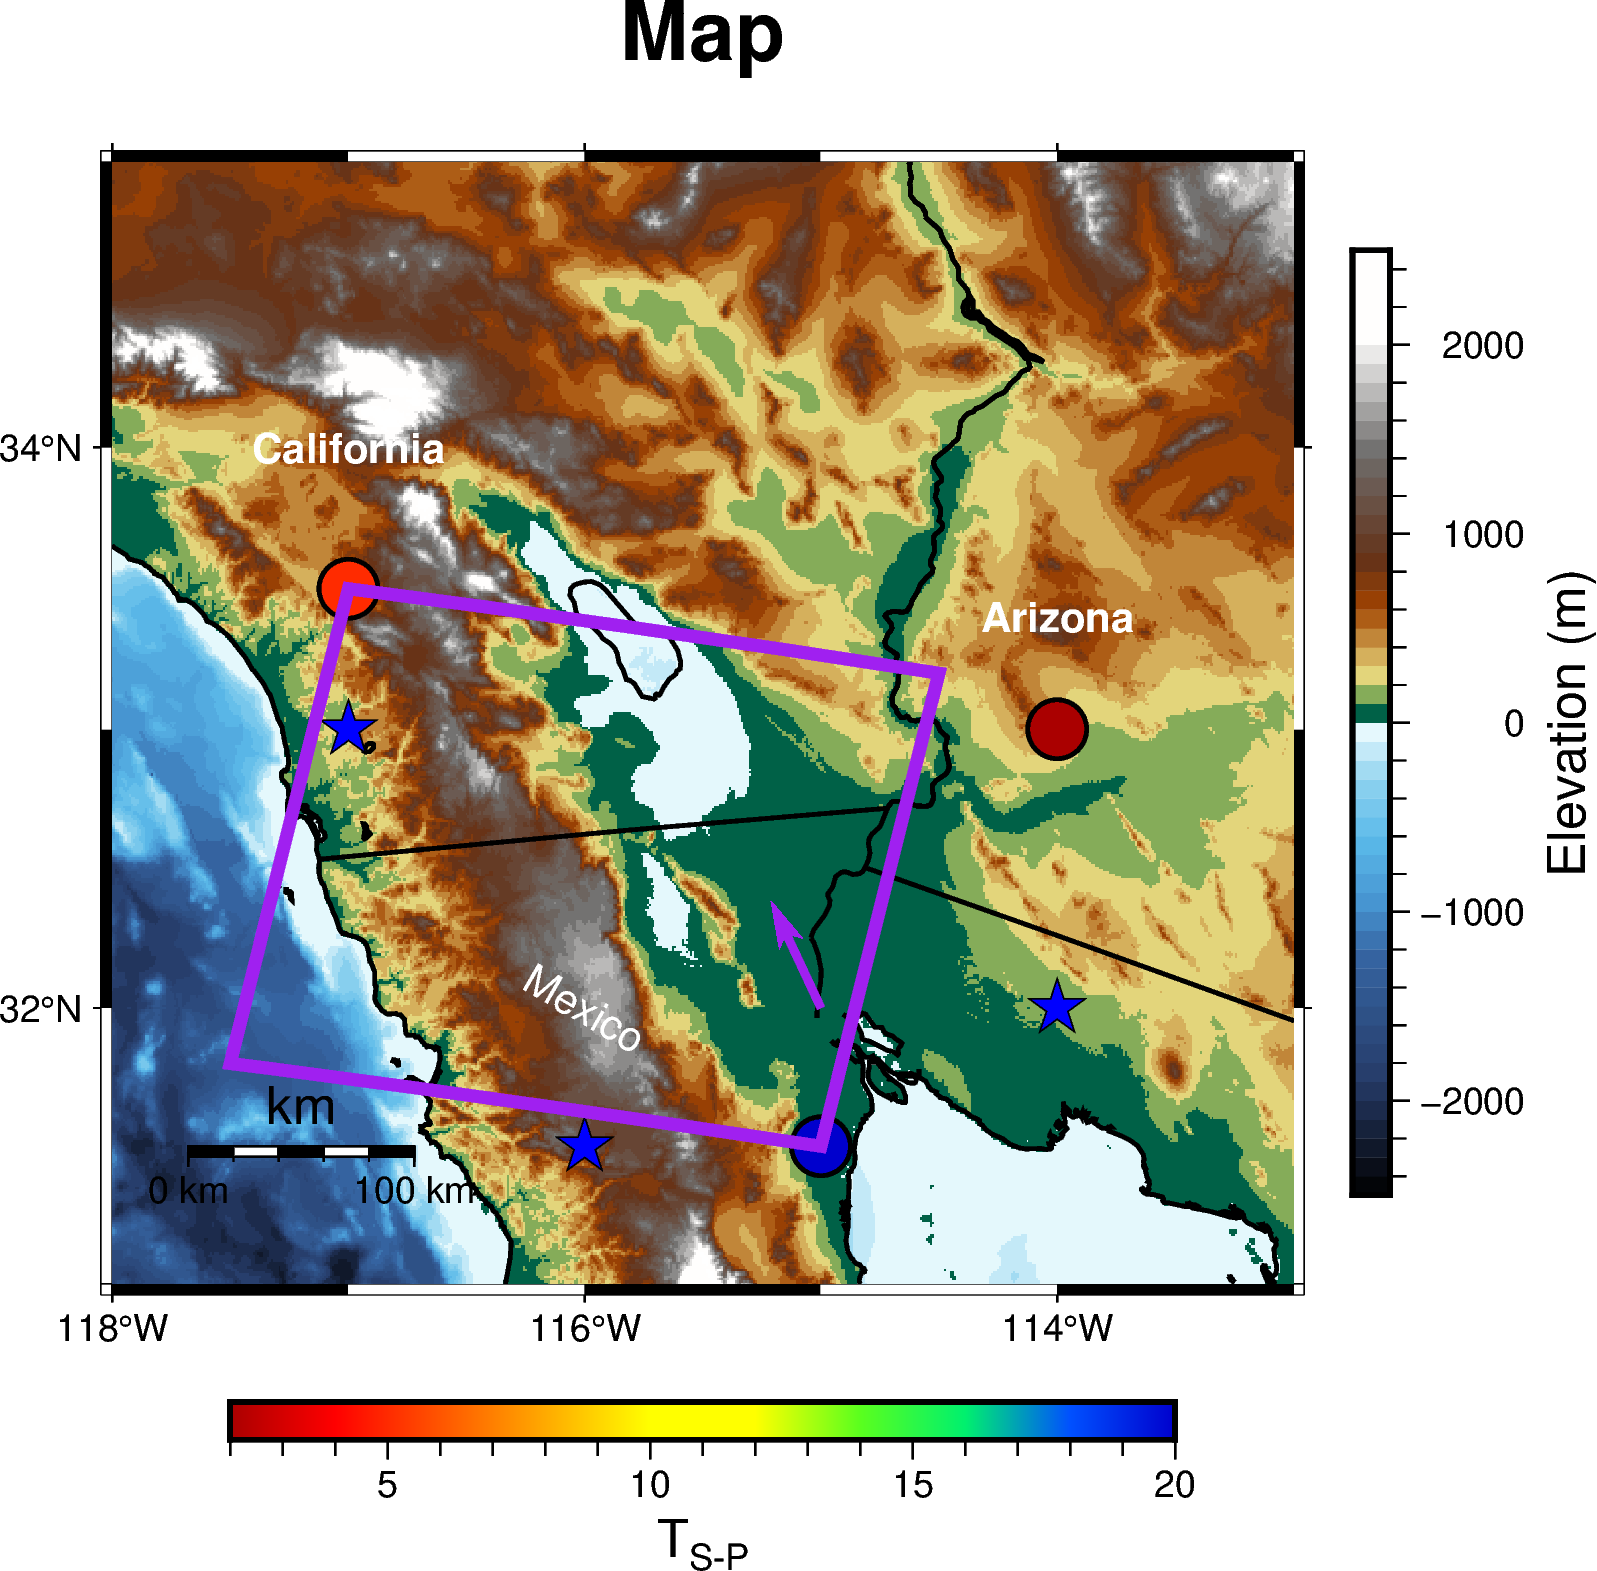

In [28]:
rect1=np.array([[-117.5, 31.8], [-117, 33.5], [-114.5, 33.2],[-115, 31.5],[-117.5, 31.8]])
fig.plot(x=rect1[:,0], y=rect1[:,1],pen="3p,purple",label="Purple")
fig.show()

add inset and rectangle on inset

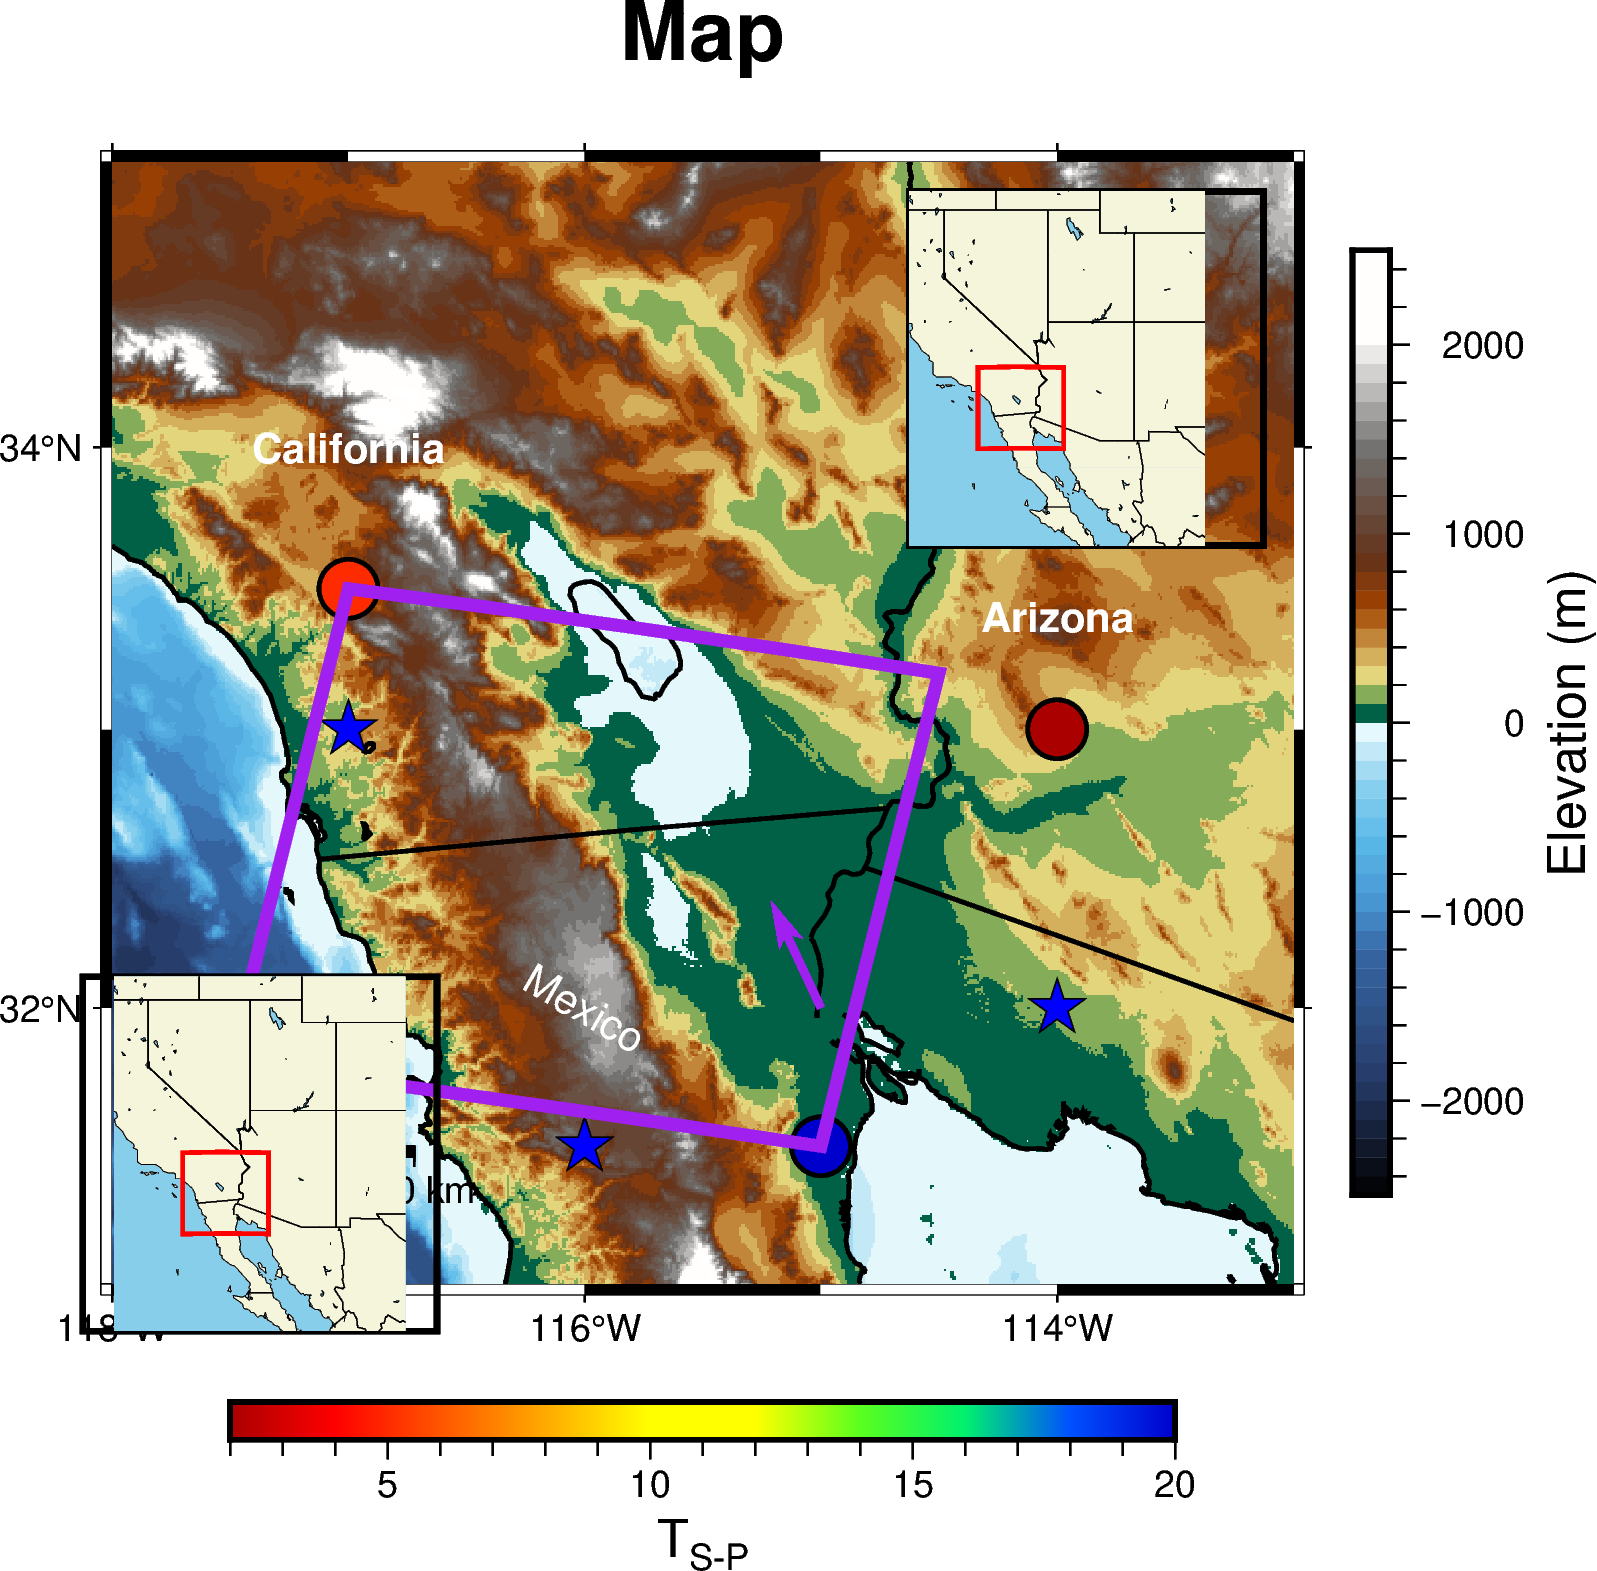

In [42]:
#add inset
with fig.inset(
    position="jTR+w3c+o0.25c/0.25c", 
    box="+pblack"
    #projection="M3c"
    ): 
    
    #position="jTR+w4.5c+o-1c/-0.75c" j - lower case = within map area, upper case = outside map area, TR=Top Right,
    # +w3c - width of map, +o0.25c/0.25c is the offset from x and y corner position, box="+pblack" - adds black outline around map
    
    # Use a plotting function to create a figure inside the inset
    fig.coast(
        region=region_inset,
        projection="M2.5c", #this should be the same size as the width you defined above
        land="beige",
        borders=["a"], #add all state borders
        water="skyblue",
        # Use dcw to selectively highlight an area
        #dcw="US.CA",#"US.CA+gred",
        shorelines="0.1p")
    
    # Plot a rectangle ("r") in the inset map to show the area of the main
    # figure. "+s" means that the first two columns are the longitude and
    # latitude of the bottom left corner of the rectangle, and the last two
    # columns the longitude and latitude of the uppper right corner.
    #rectangle = [[region_plot[0], region_plot[2], region_plot[1], region_plot[3]]] 
    rectangle = [[region_plot[0], region_plot[2], region_plot[1], region_plot[3]]]    
    fig.plot(data=rectangle, style="r+s", pen="1p,red")

    # Make sure this rectangle is in the right spot 
    
fig.show()

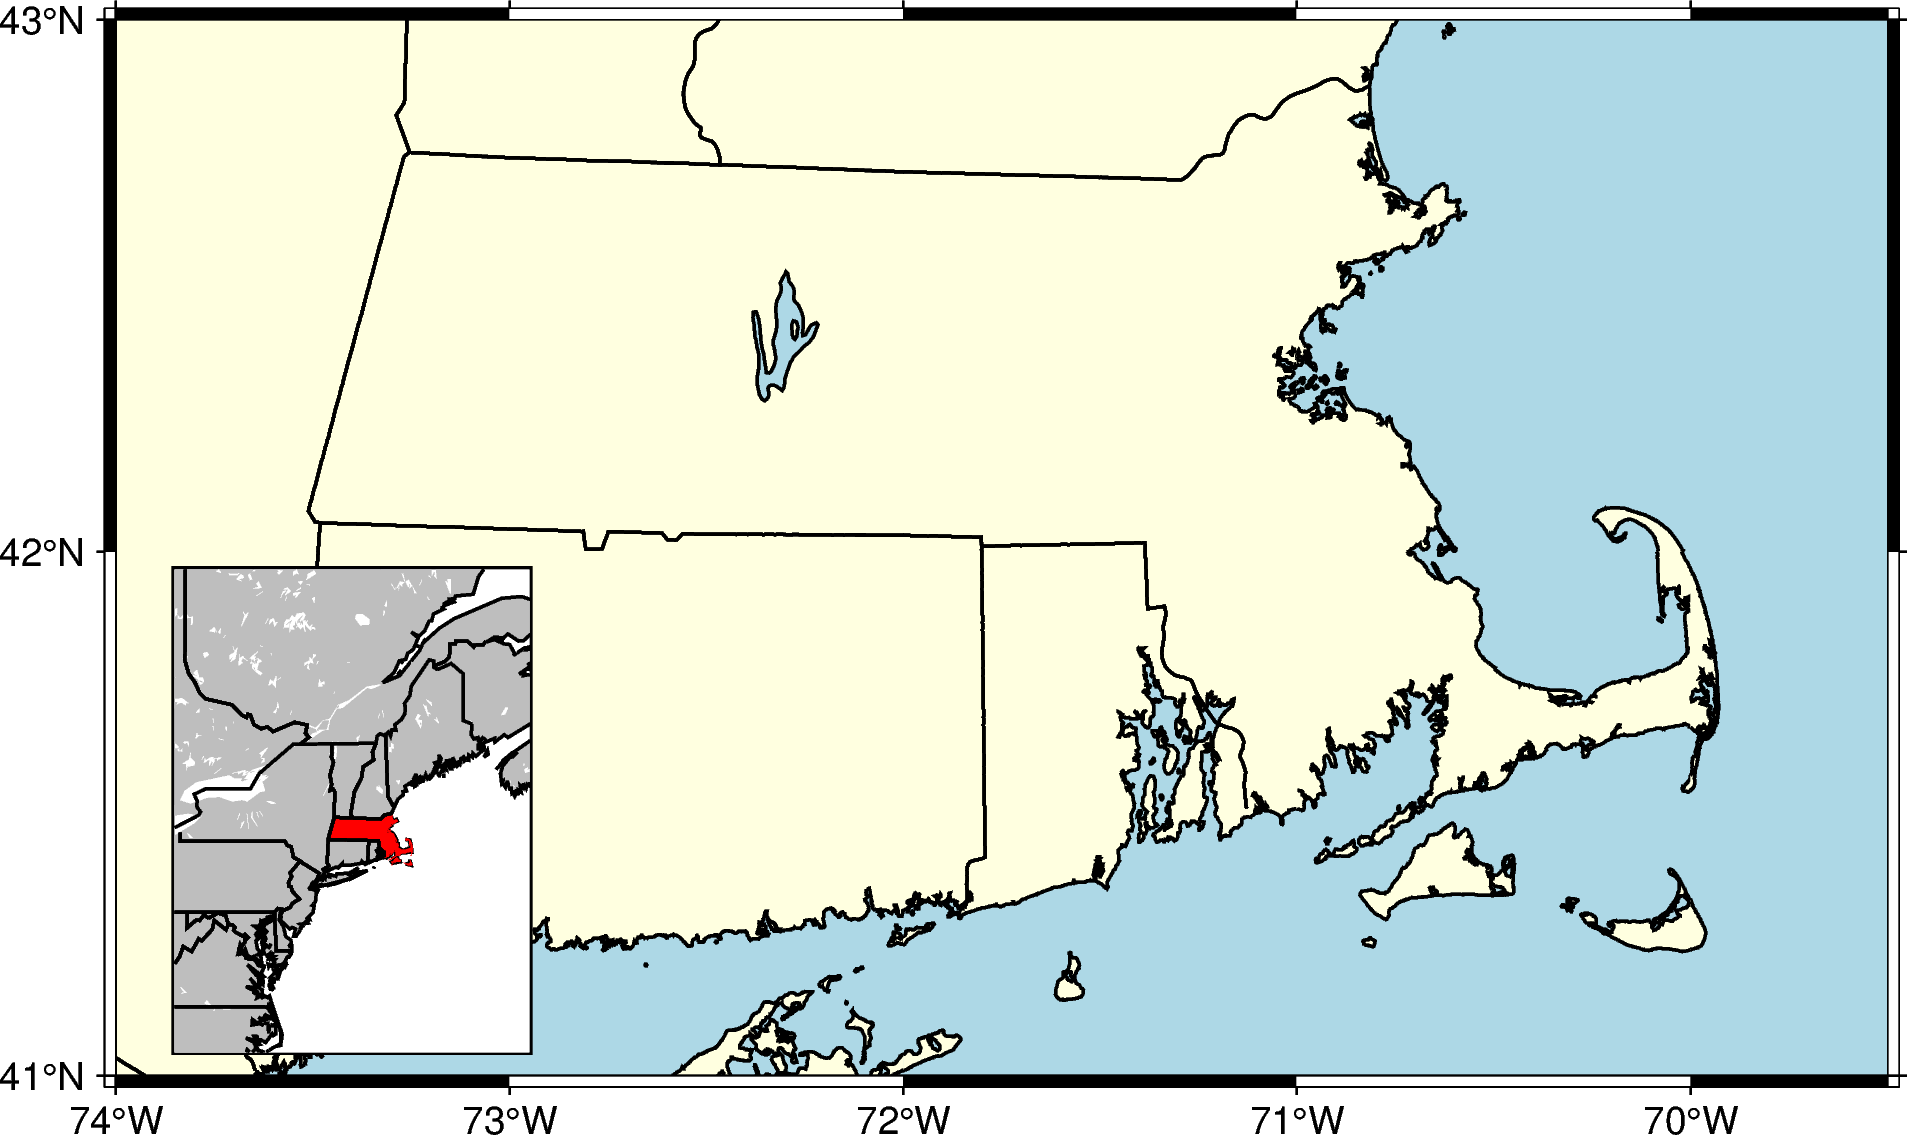

In [43]:
fig2 = pygmt.Figure()
fig2.coast(
    region=[-74, -69.5, 41, 43],
    borders="2/thin",
    shorelines="thin",
    projection="M15c",
    land="lightyellow",
    water="lightblue",
    frame="a",
)
# This does not include an inset fill as it is covered by the inset figure
# Inset width/height are determined by the ``region`` and ``projection``
# parameters.
with fig2.inset(
    position="jBL+o0.5c/0.2c",
    box="+pblack",
    region=[-80, -65, 35, 50],
    projection="M3c",
):
    # Use a plotting method to create a figure inside the inset.
    fig2.coast(
        land="gray",
        borders=[1, 2],
        shorelines="1/thin",
        water="white",
        # Use dcw to selectively highlight an area
        dcw="US.MA+gred",
    )
fig2.show()

add legend

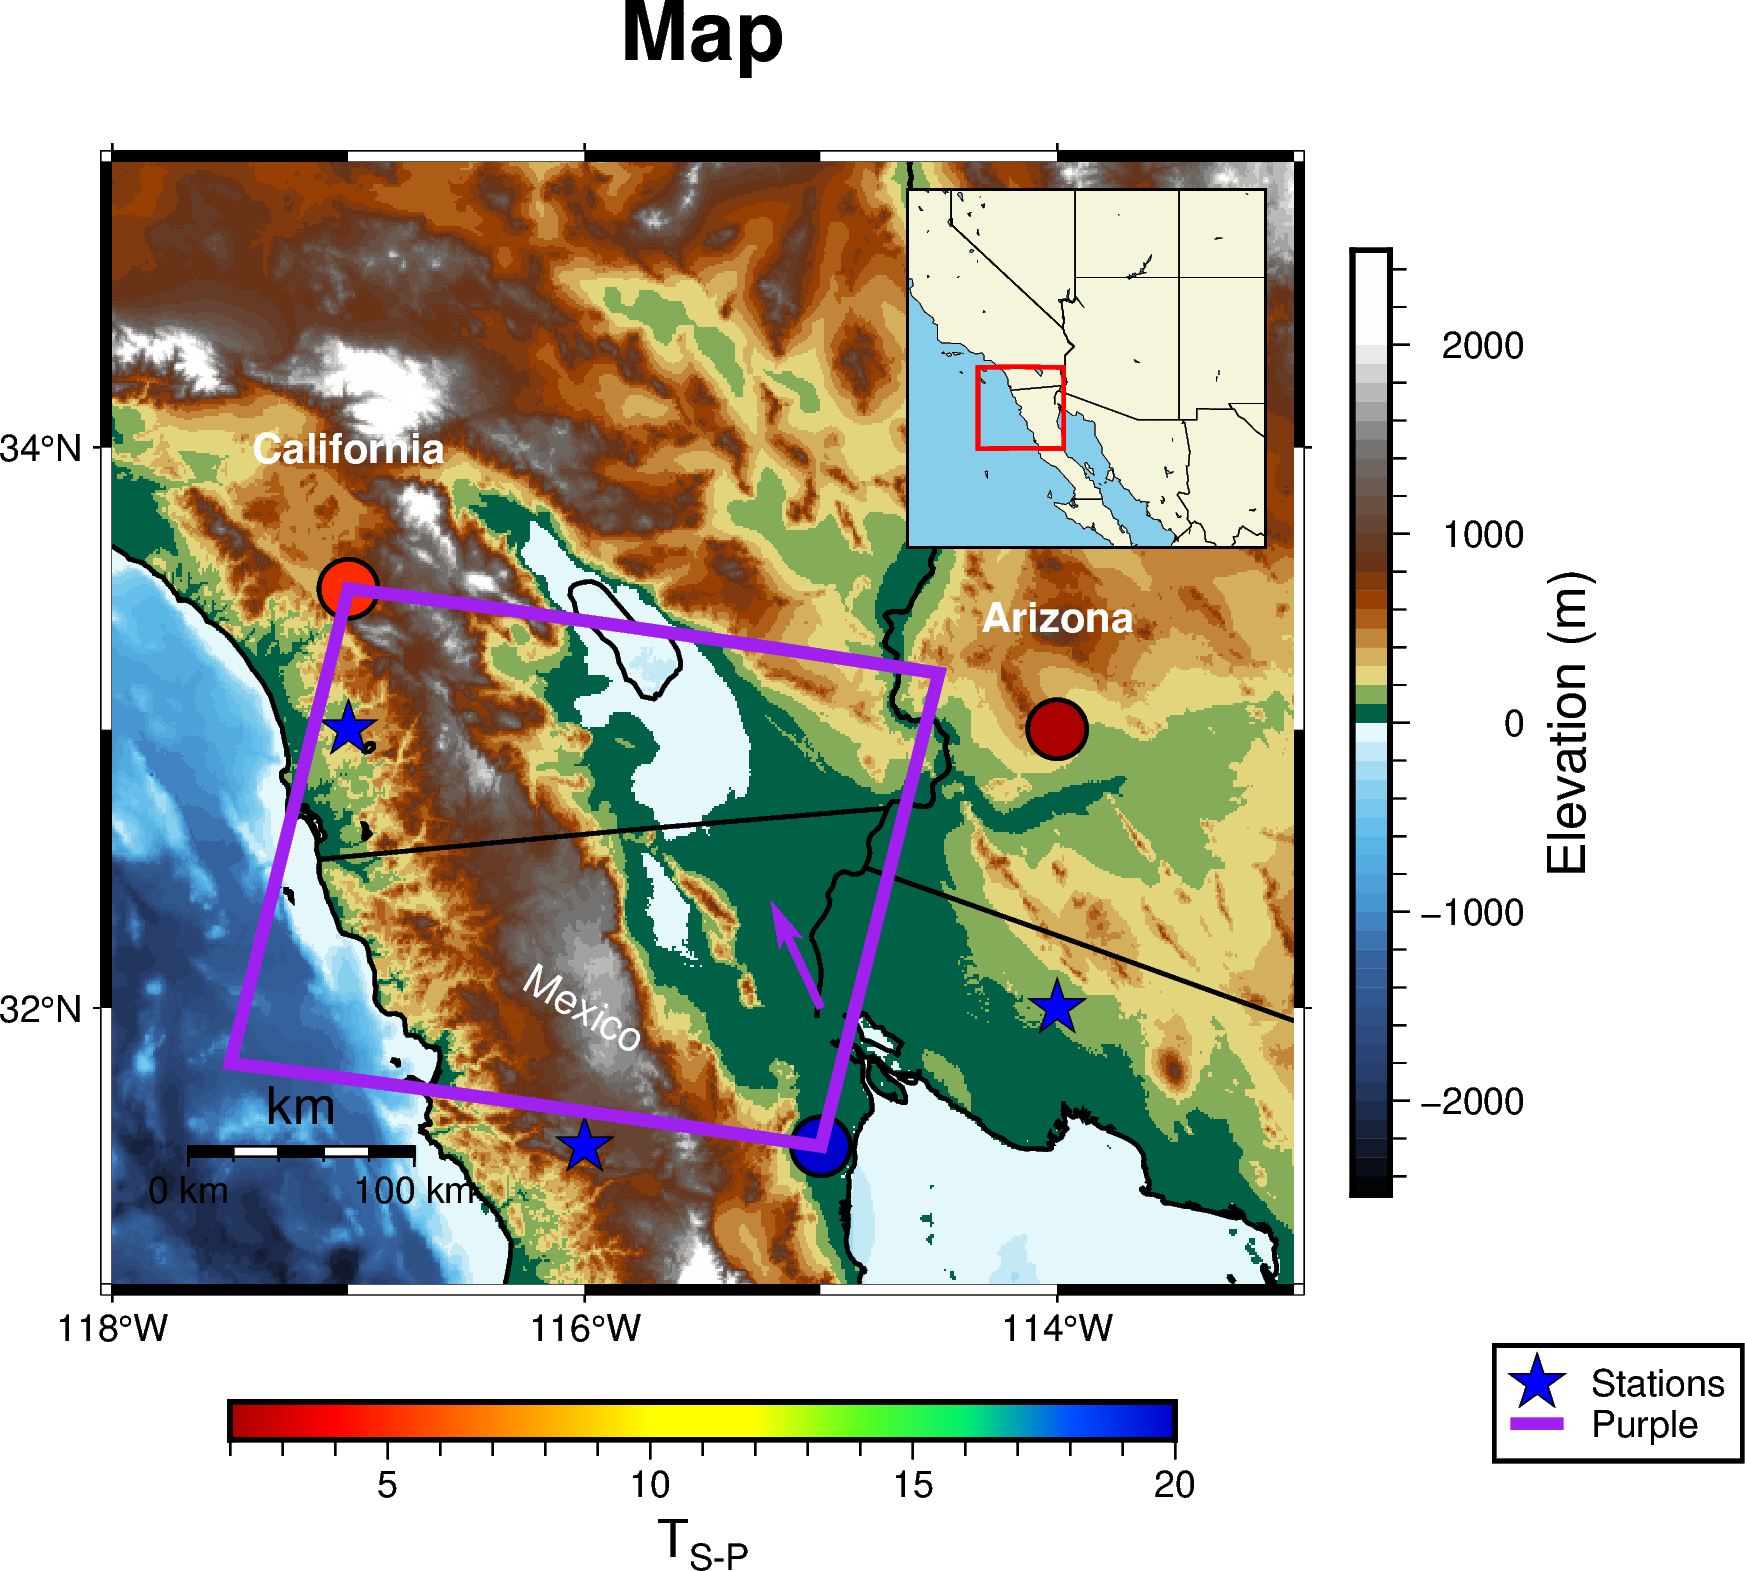

In [12]:
#plot the legend in position you want and add white box around it
fig.legend(position="jBR+o-3.8/-1.5c",box="+gwhite+p1p")

fig.show()

save as pdf, png etc. or just show figure

In [13]:
#save figure as pdf or other format
fig.savefig("Figure.pdf")
#fig.show() #show the figure